# Understanding the data we are given

In [1]:
import pickle
import numpy as np

In [182]:
# Load the variables
with open('nonnested_cval_mltsatt_l819_monday.pkl', 'rb') as f:
    results = pickle.load(f)

In [183]:
# Load the variables
with open('config.yaml', 'rb') as f:
    config_info = pickle.load(f)

In [184]:
config_info

{'experiment': {'root_name': 'augmentation/break_sequence/equal_balancing_oversampling/label_language',
  'name': '/2023_12_18_0/',
  'type': 1,
  'labels': 'binconcepts'},
 'data': {'key': 'break_sequence',
  'others': ({'gender': ['3', '4']},),
  'adjuster': {'limit': 819}},
 'ml': {'nfolds': 10,
  'epochs': 3,
  'oversampler': {'oversampling_factor': 1.5,
   'oversampling_col': ['label', 'language'],
   'rebalancing_mode': 'equal_balancing',
   'addyourownparameters': 'helloworld',
   'mode': 'augmentation'},
  'splitter': {'stratifier_col': ['stratifier_column']}},
 'seeds': {'splitter': 219, 'oversampler': 13, 'model': 139, 'numpy': 36},
 'mode': 'augmentation'}

## Results Analyse

In [185]:
results.keys()

dict_keys(['x', 'y', 'demographics', 'optim_scoring', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [186]:
len(results["x"]),len(results["y"]) # is the given data same for X -> aka 100 % of the original data

(254, 254)

In [187]:
print("Demographics keys: ",results["demographics"].keys())
print("optim scoring keys: ",results["optim_scoring"], " ; is a ", type(results["optim_scoring"]))

Demographics keys:  dict_keys(['gender', 'year', 'language', 'label', 'stratifier_col', 'oversampler_col'])
optim scoring keys:  roc  ; is a  <class 'str'>


In [188]:
# Correspond to 100 % of the original data
print(len(results["demographics"]["oversampler_col"]))

# count the number of unique values in the demographics
print(np.unique(results["demographics"]["oversampler_col"], return_counts=True))
print(np.unique(results["demographics"]["label"], return_counts=True))

254
(array(['0Deutsch', '0Français', '1Deutsch', '1Français'], dtype='<U9'), array([96, 47, 82, 29], dtype=int64))
(array(['0', '1'], dtype='<U1'), array([143, 111], dtype=int64))


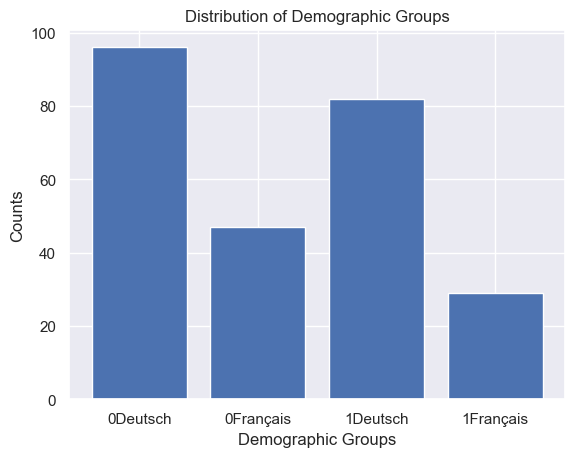

In [189]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

# Get unique values and their counts
unique_values, counts = np.unique(results["demographics"]["oversampler_col"], return_counts=True)

# Create a bar plot
plt.bar(unique_values, counts)

# Add labels and title
plt.xlabel('Demographic Groups')
plt.ylabel('Counts')
plt.title('Distribution of Demographic Groups')

# Show the plot
plt.show()

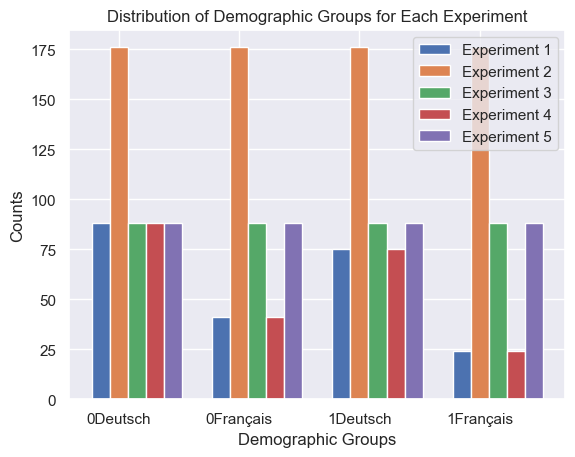

In [190]:
import matplotlib.pyplot as plt
import numpy as np

# Define the demographic groups and their counts for each experiment
experiments = [
    [('0Deutsch', 88), ('0Français', 41), ('1Deutsch', 75), ('1Français', 24)],
    [('0Deutsch', 176), ('0Français', 176), ('1Deutsch', 176), ('1Français', 176)],
    [('0Deutsch', 88), ('0Français', 88), ('1Deutsch', 88), ('1Français', 88)],
    [('0Deutsch', 88), ('0Français', 41), ('1Deutsch', 75), ('1Français', 24)],
    [('0Deutsch', 88), ('0Français', 88), ('1Deutsch', 88), ('1Français', 88)]
]

# Define the labels and the number of experiments
labels = ['0Deutsch', '0Français', '1Deutsch', '1Français']
num_experiments = len(experiments)

# Define the width of the bars and the positions of the bars for each experiment
bar_width = 0.15
bar_positions = np.arange(len(labels))

# Create a bar plot for each experiment
for i in range(num_experiments):
    experiment_dict = dict(experiments[i])
    counts = [experiment_dict.get(label, 0) for label in labels]
    plt.bar(bar_positions + i*bar_width, counts, width=bar_width, label=f'Experiment {i+1}')

# Add labels and title
plt.xlabel('Demographic Groups')
plt.ylabel('Counts')
plt.title('Distribution of Demographic Groups for Each Experiment')

# Add a legend and set the x-ticks to be the demographic groups
plt.legend()
plt.xticks(bar_positions + bar_width, labels)

# Show the plot
plt.show()

## Study of 1 fold

In [191]:
# The numbers for 0 to 10 are the results of each of the 10 folds
print(results[1].keys())

dict_keys(['train_index', 'test_index', 'oversample_indexes', 'x_resampled', 'y_resampled', 'x_resampled_train', 'y_resampled_train', 'x_resampled_val', 'y_resampled_val', 'best_params', 'gender', 'year', 'language', 'label', 'y_pred', 'y_proba', 'accuracy', 'balanced_accuracy', 'precision', 'recall', 'roc', 'tp', 'fp', 'fn'])


In [192]:
train_indices = results[1]["train_index"]
demographics_data = results["demographics"]["oversampler_col"]

# Get the demographic information for the training indices
train_demographics = [demographics_data[i] for i in train_indices]

info_demo_train_fold_1 = np.unique(train_demographics, return_counts=True)
print(info_demo_train_fold_1)

(array(['0Deutsch', '0Français', '1Deutsch', '1Français'], dtype='<U9'), array([87, 41, 72, 28], dtype=int64))


In [193]:
print(results[1]["train_index"][0:10], len(results[1]["train_index"]), "\n")
print(results[1]["test_index"], len(results[1]["test_index"]), "\n")
print(len(results[1]["oversample_indexes"]),"; # of unique values:",len(np.unique(np.array(results[1]["oversample_indexes"]))))

a = info_demo_train_fold_1[1].max()
print("demo after os:", a*2 , "|lables after os: ",(a*2)*2,"|total data after os:",(a*2)*2 *2)

[ 0  1  3  4  6  7  8  9 10 11] 228 

[  2   5  13  23  40  83 104 112 121 126 142 155 158 161 166 169 174 184
 200 202 214 217 223 224 240 242] 26 

696 ; # of unique values: 228
demo after os: 174 |lables after os:  348 |total data after os: 696


In [194]:
len(results[1]["x_resampled"]), len(results[1]["x_resampled_train"]), len(results[1]["x_resampled_val"])

(696, 696, 26)

In [195]:
results[1]["x_resampled"] == results[1]["x_resampled_train"]

True

In [196]:
# The data given to the Classifier afther oversampling !
results[1]["x_resampled_train"][0][0], results[1]["x_resampled_train"][-1][0] # fold 1 with the number of student x number of their sequences

([0, 0, 0, 1, 0, 0, 0, 0, 0, 7.889], [0, 0, 0, 1, 0, 0, 0, 0, 0, 5.562])

In [197]:
results[1].keys()

dict_keys(['train_index', 'test_index', 'oversample_indexes', 'x_resampled', 'y_resampled', 'x_resampled_train', 'y_resampled_train', 'x_resampled_val', 'y_resampled_val', 'best_params', 'gender', 'year', 'language', 'label', 'y_pred', 'y_proba', 'accuracy', 'balanced_accuracy', 'precision', 'recall', 'roc', 'tp', 'fp', 'fn'])

In [198]:
results[1]["best_params"]

{'seed': 1,
 'batch_size': 16,
 'cell_type': 'GRU',
 'dropout': 0.02,
 'early_stopping': False,
 'loss': 'auc',
 'n_cells': [32],
 'n_layers': 1,
 'optimiser': 'adam',
 'padding_value': -1,
 'shuffle': True,
 'verbose': -1,
 'save_best_model': False,
 'flatten': 'average',
 'epochs': 3}

In [199]:
results[1]["y_pred"][0:2], results[1]["y_proba"][0:2]

([1, 1],
 array([[0.37756398, 0.622436  ],
        [0.38925666, 0.61074334]], dtype=float32))

In [200]:
results[1]["accuracy"], results[1]["balanced_accuracy"], results[1]["precision"], results[1]["recall"], results[1]["roc"]

(0.6923076923076923,
 0.6727272727272727,
 0.6666666666666666,
 0.5454545454545454,
 0.6909090909090909)

In [201]:
# Make mean of the results acrross the 10 folds
mean_roc = []
for i in range(10):
    mean_roc.append(results[i]["roc"])
mean_roc = np.array(mean_roc).mean()

print("Mean ROC: ", mean_roc)

Mean ROC:  0.6035389610389611


In [89]:
results[1]["label"]

{'fn': {'0': -1, '1': 0.45454545454545453},
 'tn': {},
 'roc': {'0': -1, '1': -1},
 'recall': {'0': 0.0, '1': 0.5454545454545454},
 'precision': {'0': 0.0, '1': 1.0},
 'balanced_accuracy': {'0': 0.8, '1': 0.5454545454545454}}

In [90]:
results[1]["language"]

{'fn': {'Deutsch': 0.5, 'Français': 0.0},
 'tn': {},
 'roc': {'Deutsch': 0.7000000000000001, 'Français': 0.8333333333333334},
 'recall': {'Deutsch': 0.5, 'Français': 1.0},
 'precision': {'Deutsch': 0.8333333333333334, 'Français': 0.3333333333333333},
 'balanced_accuracy': {'Deutsch': 0.6944444444444444,
  'Français': 0.8333333333333333}}

## Full data, sequences and labels

In [ ]:
with open('sequences.pkl', 'rb') as f:
    sequences = pickle.load(f)

with open('labels.pkl', 'rb') as f:
    labels = pickle.load(f)

with open('demographics.pkl', 'rb') as f:
    demographics = pickle.load(f)

with open('full_data.pkl', 'rb') as f:
    full_data = pickle.load(f)

In [2]:
student_index = 0
full_data[student_index].keys()

dict_keys(['path', 'length', 'learner_id', 'raw_sequence', 'raw_begin', 'raw_end', 'last_timestamp', 'permutation', 'gender', 'year', 'language', 'begin', 'end', 'break_sequence', 'sequence', 'label', '1hot-sequence', 'nobreak', 'nobreak-1hot-sequence', 'stratifier_column'])

In [3]:
print("normal sequence", full_data[student_index]['sequence'][0:2])
print("1-hot encoded",full_data[student_index]['1hot-sequence'][0:2])
print("break_sequence", full_data[student_index]['break_sequence'][0:2])

normal sequence [[0, 0, 0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3440621047581669], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.9999999999999999, 0.0]]
1-hot encoded [[0, 0, 0, 1, 0, 0, 0, 0, 0, 1], [0, 0, 0, 1, 0, 0, 0, 0, 1, 0]]
break_sequence [[0, 0, 0, 1, 0, 0, 0, 0, 0, 7.889], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 75.141, 0.0]]


In [4]:
type(sequences), len(sequences) ,sequences[0][0:3] # number student and senquences

(list,
 254,
 [[0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
  [0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
  [0, 0, 0, 1, 0, 0, 0, 0, 0, 1]])

In [11]:
# See the max and min length of the sequences
max_len = 0
min_len = 1000
for seq in sequences:
    if len(seq) > max_len:
        max_len = len(seq)
    if len(seq) < min_len:
        min_len = len(seq)
print(max_len, min_len)

len(sequences[10])

819 13


102

In [5]:
len(labels) , labels[0:7]

(254, [1, 1, 1, 1, 1, 1, 0])

In [6]:
type(demographics), len(demographics) , demographics.keys()

(dict,
 6,
 dict_keys(['gender', 'year', 'language', 'label', 'stratifier_col', 'oversampler_col']))

In [7]:
# line 83 form nonested_cv.py used in ml_pipline.py
"""demographics_train = {}
for demo in demographics:
    demographics_train[demo] = [
        demographics[demo][idx] for idx in train_index
    ]"""

for demo in demographics:
    print(demo)

gender
year
language
label
stratifier_col
oversampler_col


In [8]:
len(demographics["language"]), demographics["language"][7:16]

(254,
 ['Français',
  'Deutsch',
  'Deutsch',
  'Deutsch',
  'Deutsch',
  'Deutsch',
  'Français',
  'Français',
  'Français'])

In [9]:
len(demographics["oversampler_col"]), demographics["oversampler_col"][7:16]

(254,
 ['0Français',
  '0Deutsch',
  '1Deutsch',
  '1Deutsch',
  '0Deutsch',
  '0Deutsch',
  '0Français',
  '1Français',
  '0Français'])